# Importing Libraries

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

# Overview of Normalization

The main purpose of normalization is to bring the transformation so that all the features work on the same or similar level of scale.

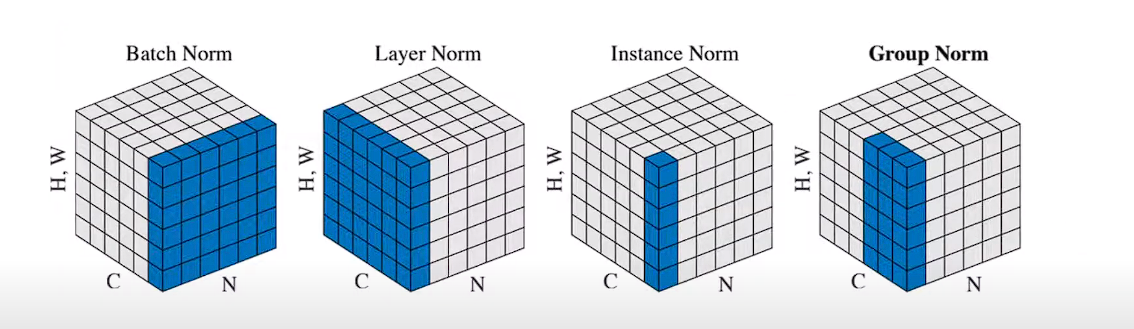

# Batch Normalization

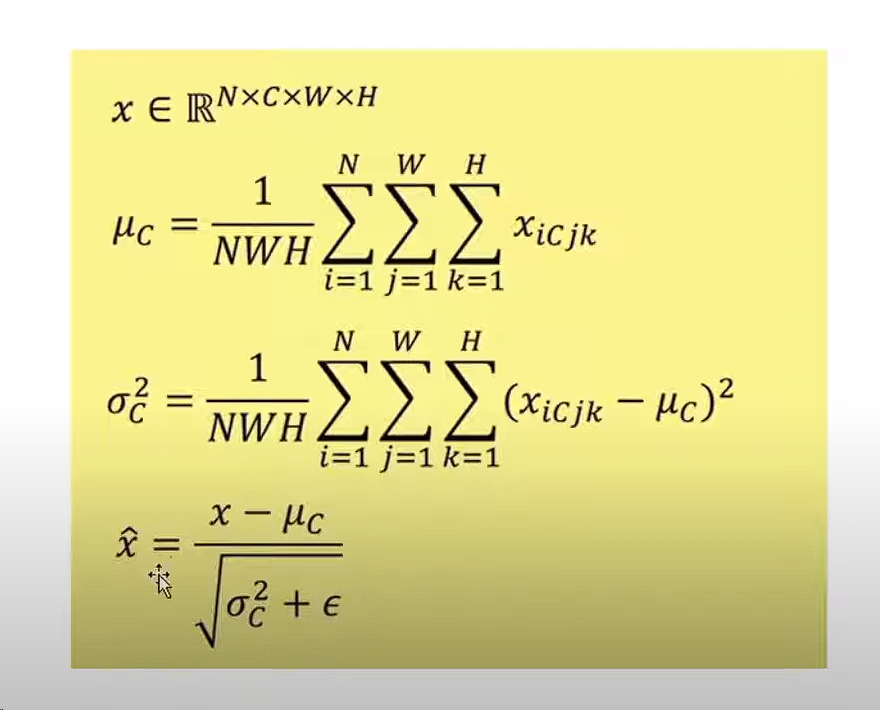
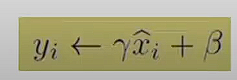


In [5]:
inputs = Input(shape = (224,224,3))
conv = Conv2D(32,3,padding = 'valid')(inputs)
conv = Conv2D(64,3,padding = 'valid')(conv)
conv = Conv2D(128,3,padding = 'valid')(conv)
conv = BatchNormalization(axis = -1, # per channel
                          synchronized= False  # Only relevant when using strategy
                          )(conv)
conv = Conv2D(256,3,padding = 'valid')(conv)

model = Model(inputs = [inputs], outputs = [conv])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 218, 218, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 216, 216, 256)  │       295,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 388,928 (1.48 MB)

 Trainable params: 388,672 (1.48 MB)

 Non-trainable params: 256 (1.00 KB)

# Layer Normalization

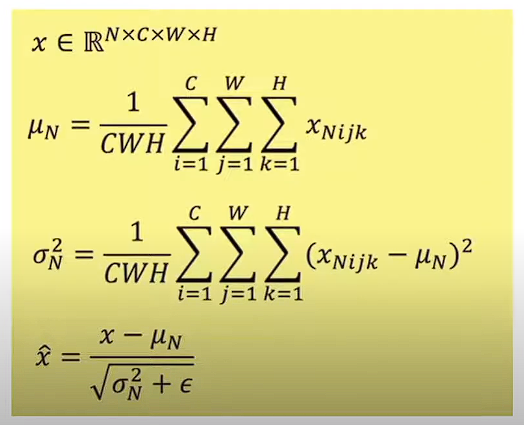
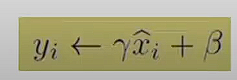

In [7]:
inputs = Input(shape = (224,224,3))
conv = Conv2D(32,3,padding = 'valid')(inputs)
conv = Conv2D(64,3,padding = 'valid')(conv)
conv = Conv2D(128,3,padding = 'valid')(conv)
conv = LayerNormalization(axis = -1, # per channel. This is typically a features axis 
                          )(conv)
conv = Conv2D(256,3,padding = 'valid')(conv)

model = Model(inputs = [inputs], outputs = [conv])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 220, 220, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 218, 218, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (None, 218, 218, 128)  │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 216, 216, 256)  │       295,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 388,672 (1.48 MB)

 Trainable params: 388,672 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

# Instance Normalization

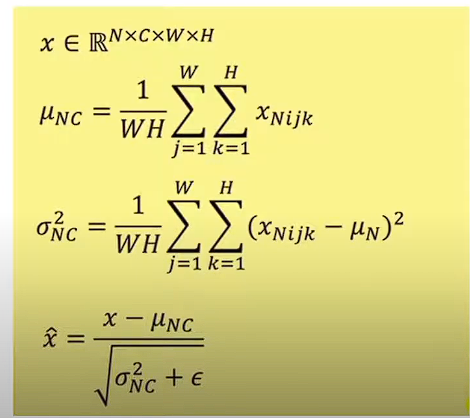
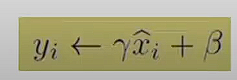


In [9]:
inputs = Input(shape = (224,224,3))
conv = Conv2D(32,3,padding = 'valid')(inputs)
conv = Conv2D(64,3,padding = 'valid')(conv)
conv = Conv2D(128,3,padding = 'valid')(conv)
conv = GroupNormalization(groups = -1, # set -1 for instance normalization
                          axis = -1, # per channel. This is typically a features axis 
                          )(conv)
conv = Conv2D(256,3,padding = 'valid')(conv)

model = Model(inputs = [inputs], outputs = [conv])
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 220, 220, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 218, 218, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ group_normalization_1           │ (None, 218, 218, 128)  │           256 │
│ (GroupNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 216, 216, 256)  │       295,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 388,672 (1.48 MB)

 Trainable params: 388,672 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

# Group Normalization

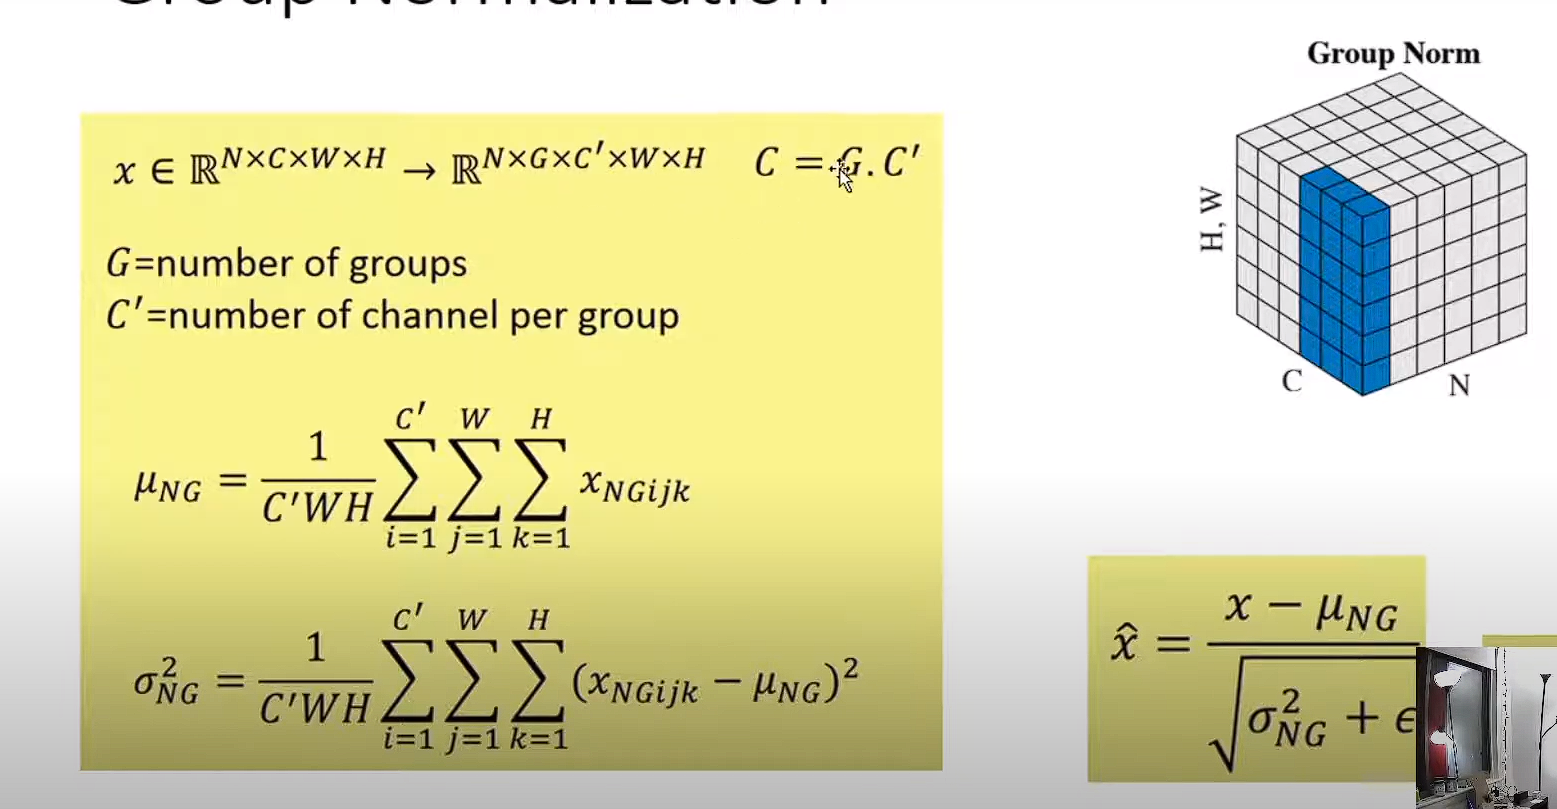
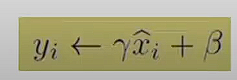

In [11]:
inputs = Input(shape = (224,224,3))
conv = Conv2D(32,3,padding = 'valid')(inputs)
conv = Conv2D(64,3,padding = 'valid')(conv)
conv = Conv2D(128,3,padding = 'valid')(conv)
conv = GroupNormalization(groups = 16, # set no of groups in the multiple of input layer axis for group normalization
                          axis = -1, # per channel. This is typically a features axis 
                          )(conv)
conv = Conv2D(256,3,padding = 'valid')(conv)

model = Model(inputs = [inputs], outputs = [conv])
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 220, 220, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 218, 218, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ group_normalization_3           │ (None, 218, 218, 128)  │           256 │
│ (GroupNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 216, 216, 256)  │       295,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 388,672 (1.48 MB)

 Trainable params: 388,672 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

# References

[All About Normalizations! - Batch, Layer, Instance and Group Norm](https://www.youtube.com/watch?v=1JmZ5idFcVI&ab_channel=ChiDotPhi)

Thank you 🙏 and please Upvote👍